In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
df=pd.read_excel('glass.xlsx', sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [8]:
#numerical features
numerical = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
#categorical features
categorical = ['Type']

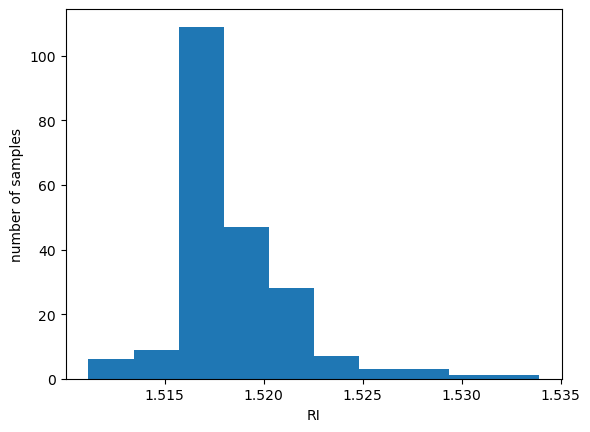

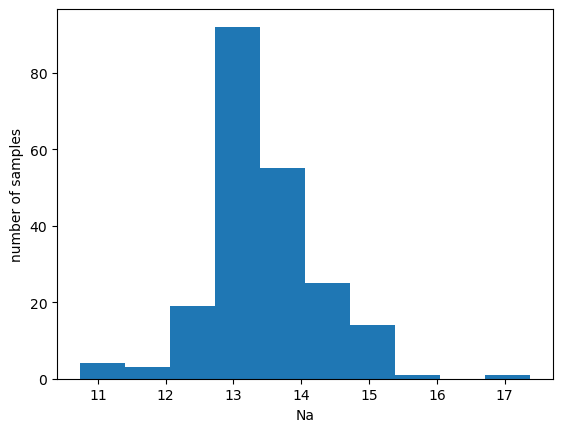

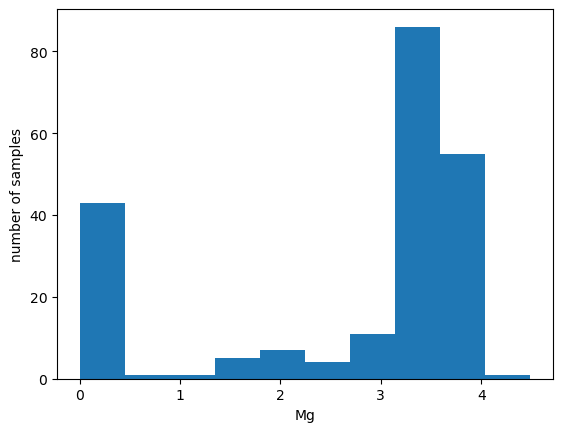

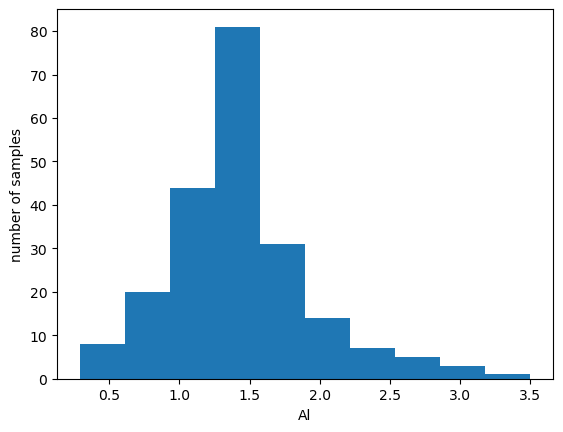

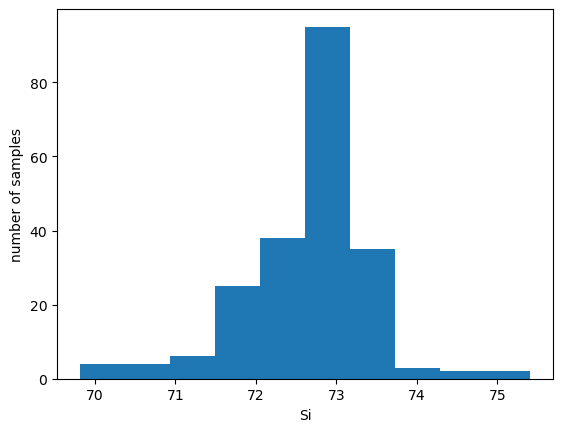

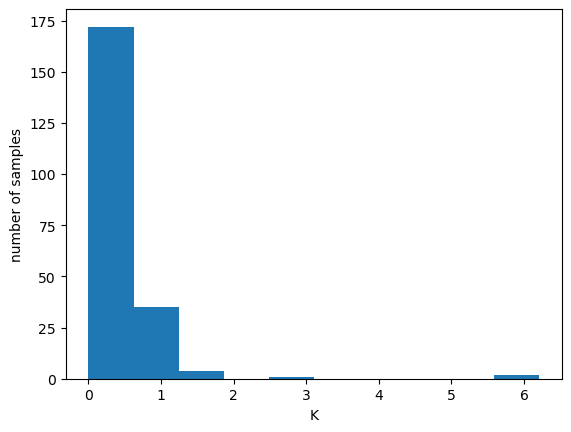

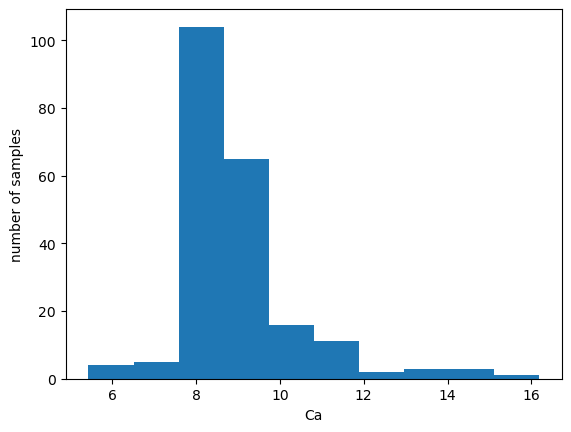

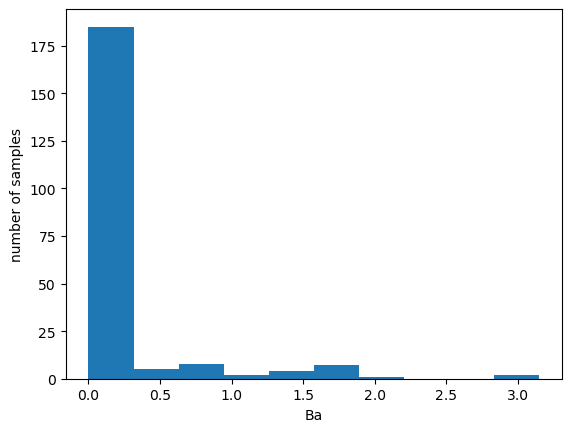

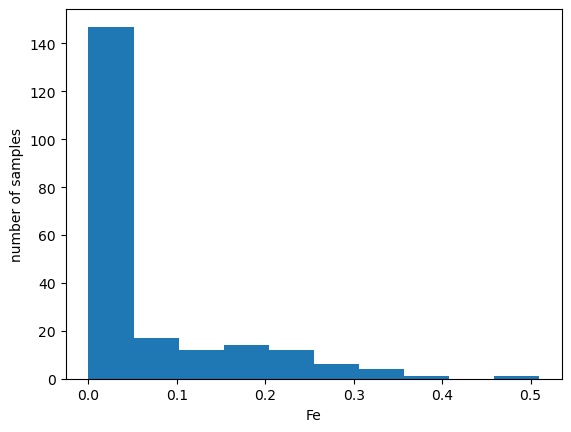

In [9]:
#numerical data distribution
for i in df[numerical].columns:
    plt.hist(df[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of samples')
    plt.show()

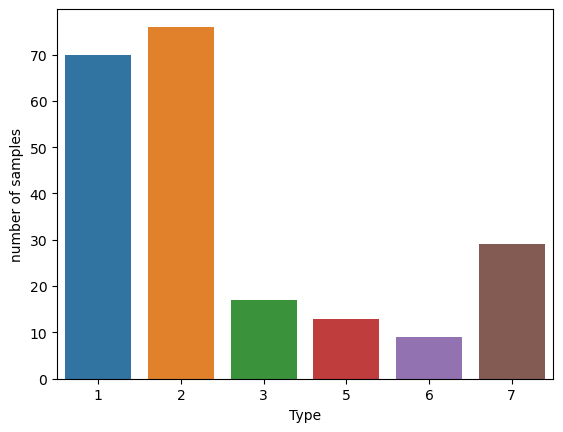

In [10]:
#categorical data distribution
for i in df[categorical].columns:
    sns.barplot(x=df[categorical][i].value_counts().index, y=df[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of samples')
    plt.show()

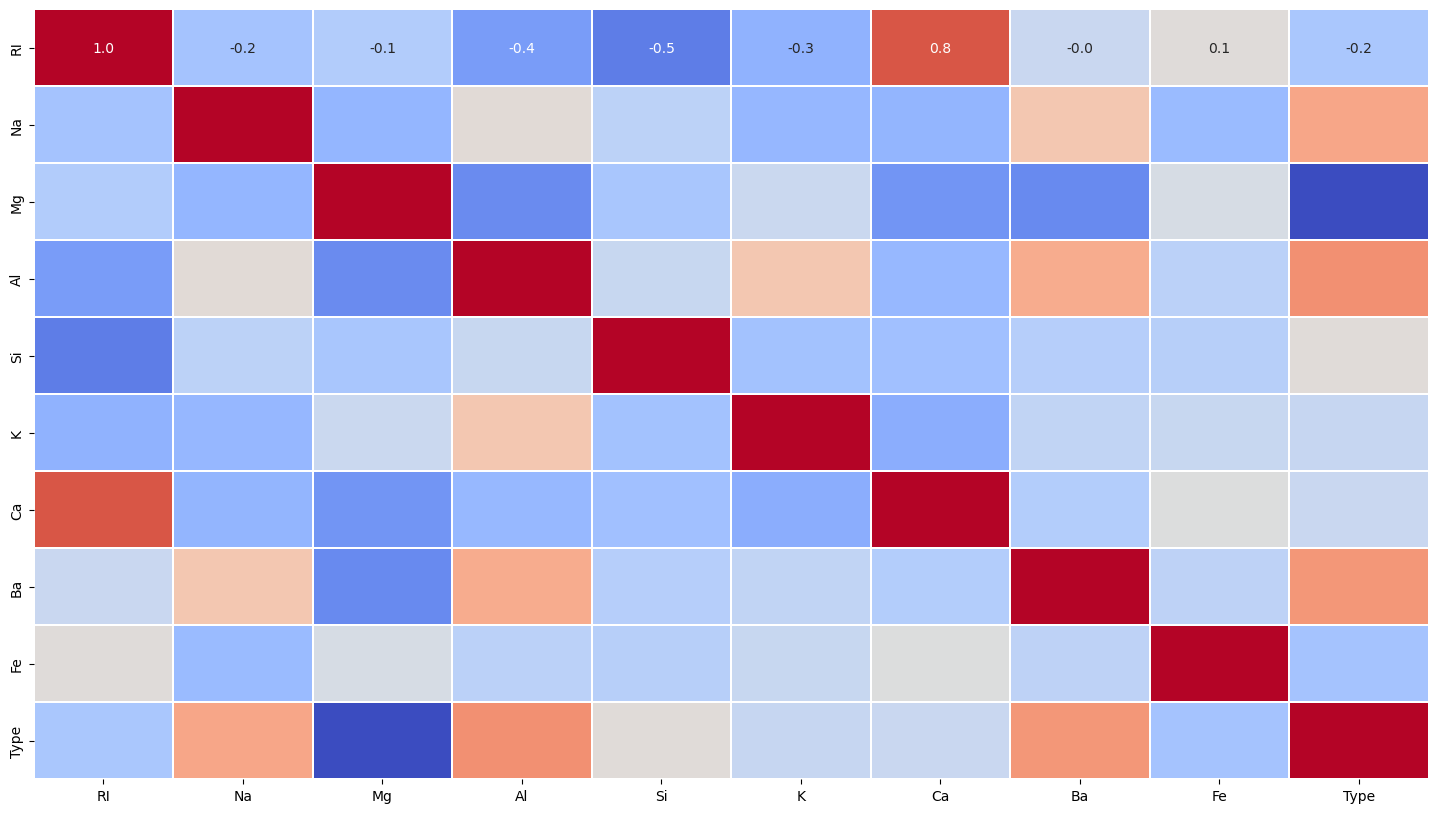

In [13]:
#heat map to see numerical correlations
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

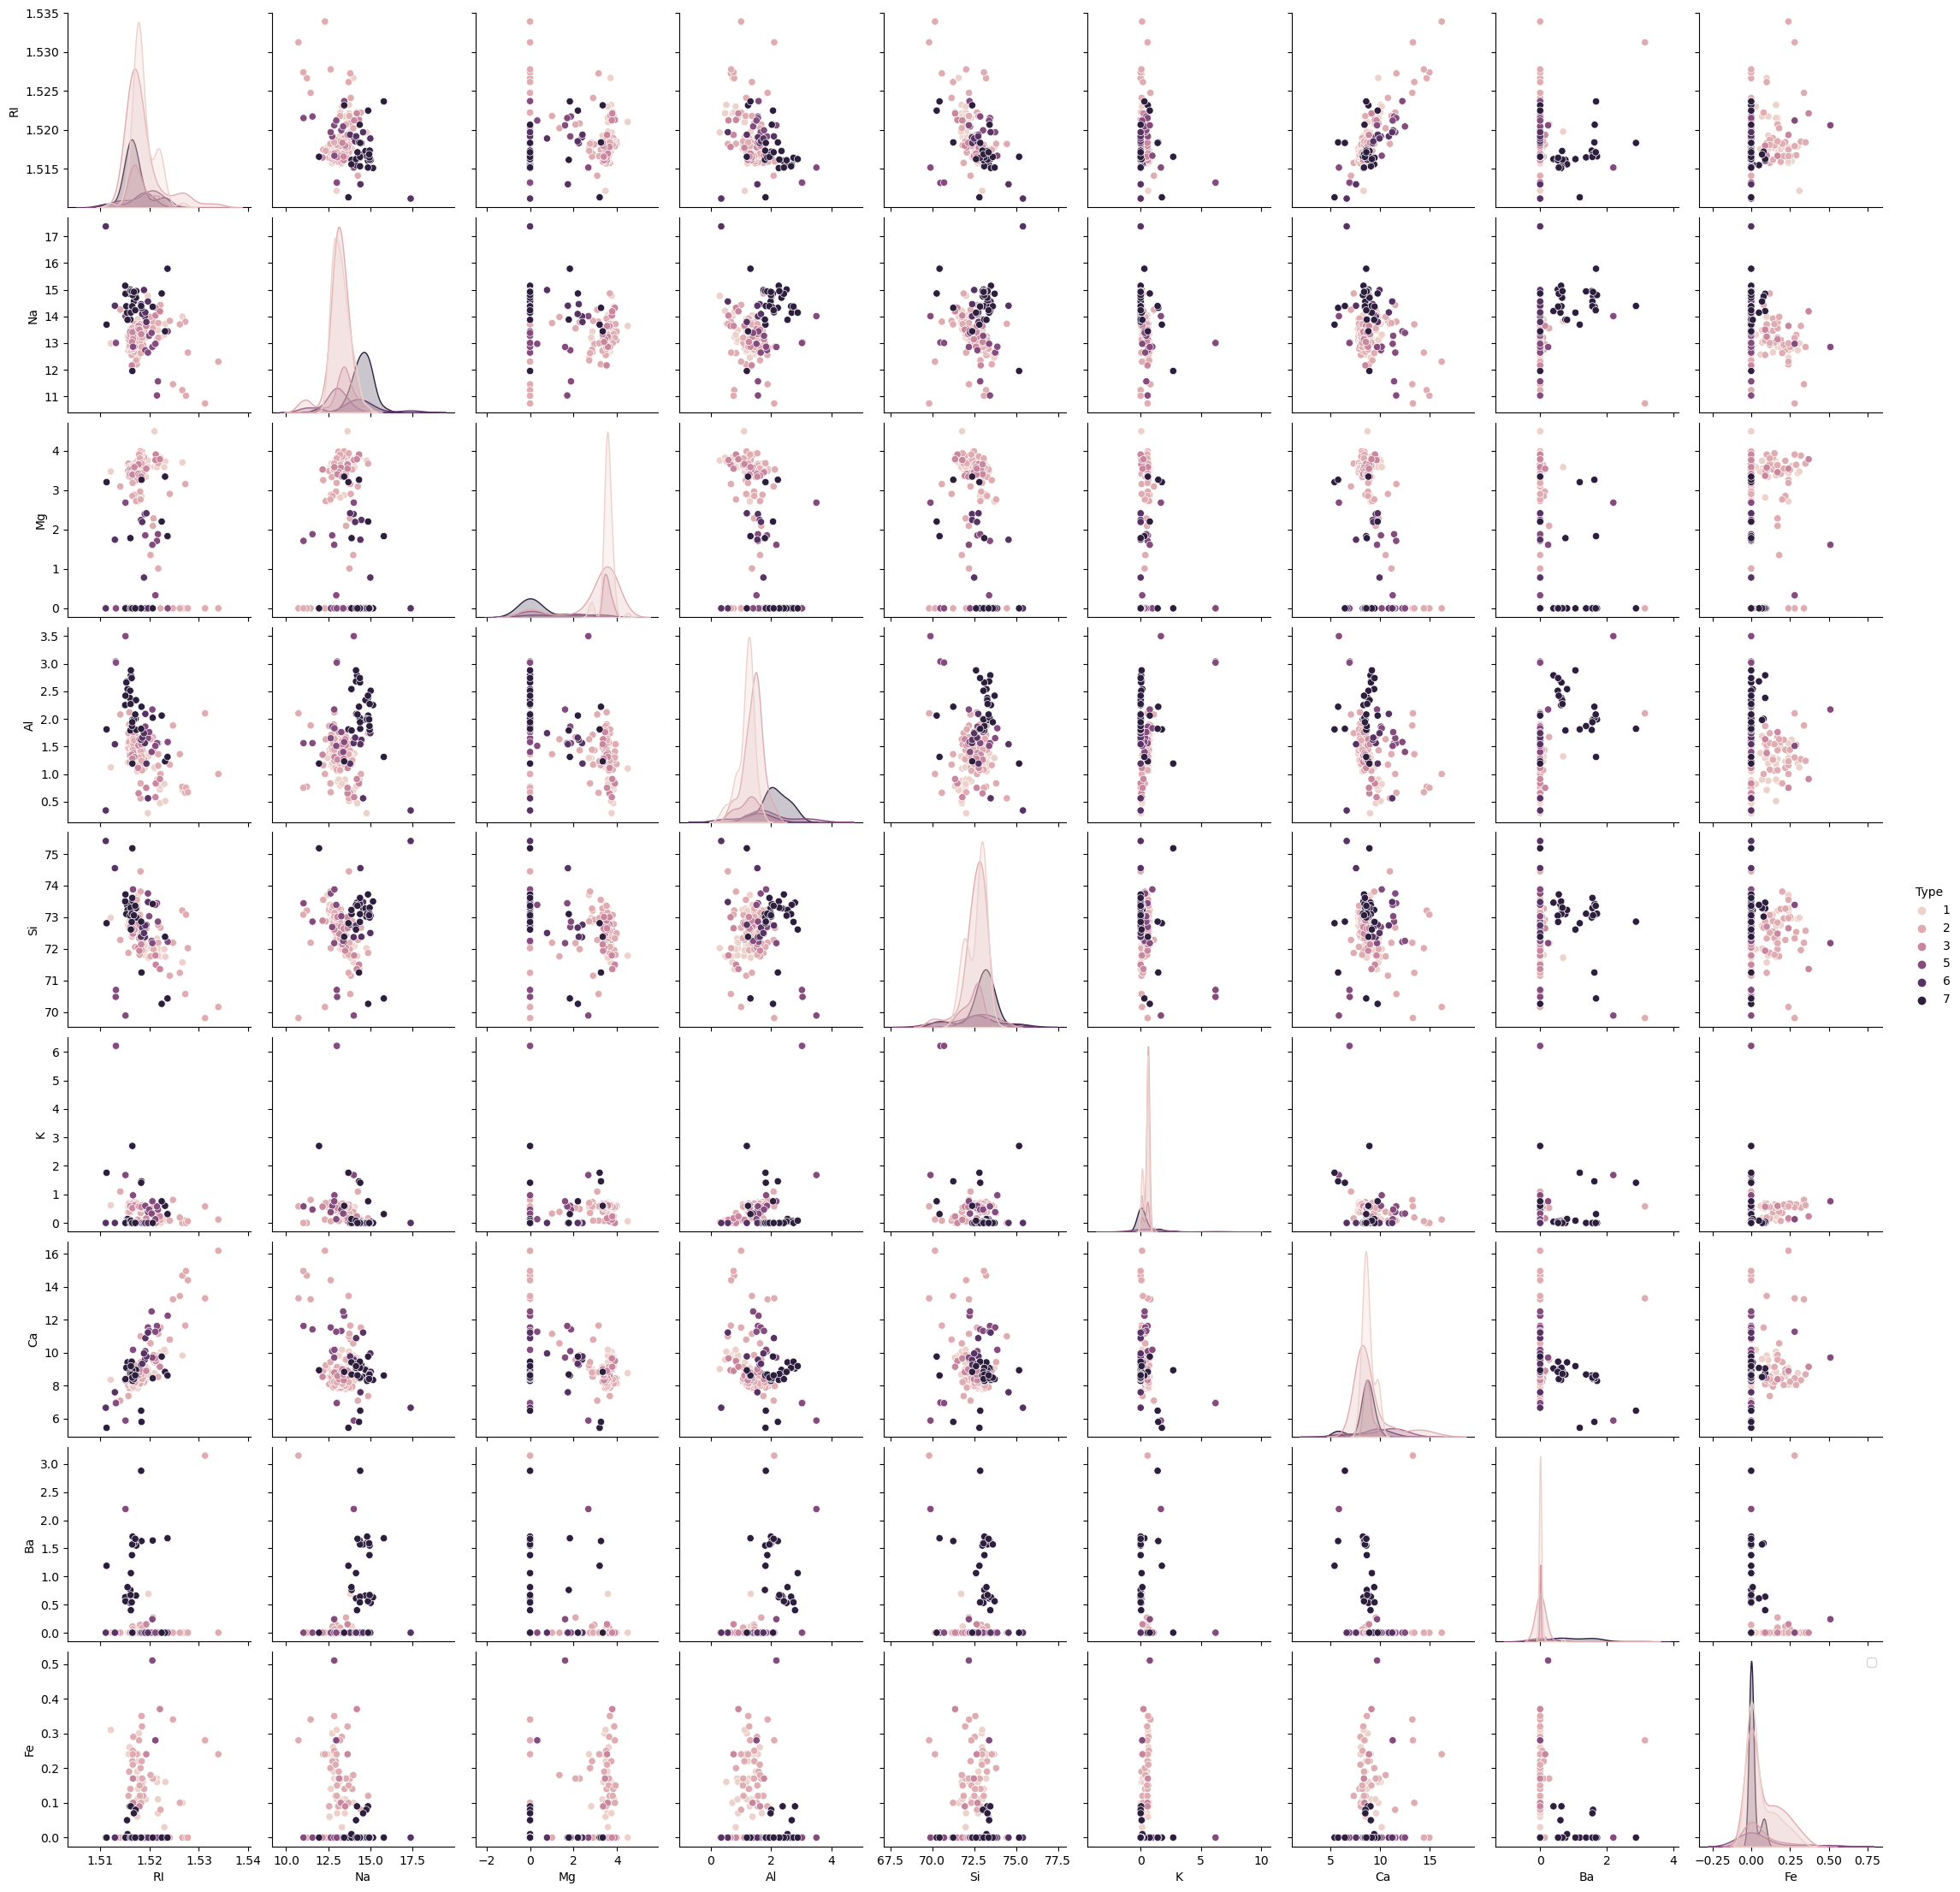

In [12]:
sns.pairplot(df,hue='Type')
plt.legend()
plt.show()

In [16]:
#checking for missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
df2 = df.copy()
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [21]:
x = df2.drop('Type', axis = 1)
y = df2['Type']
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.75, random_state=1)

In [24]:
y_train.head()

195    7
171    5
76     2
126    2
176    6
Name: Type, dtype: int64

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[300,400,500,600,700,800],
              'max_depth':[5,6,7,8,9,10] ,
              'n_jobs':[-1],
              'max_features':[3,4,5]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=parameters)

In [26]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5],
                         'n_estimators': [300, 400, 500, 600, 700, 800],
                         'n_jobs': [-1]})

In [27]:
best_param= grid_search.best_params_
best_param

{'max_depth': 9, 'max_features': 3, 'n_estimators': 300, 'n_jobs': -1}

In [28]:
best_model = grid_search.best_estimator_

In [29]:
y_pred= best_model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8148148148148148

In [38]:
#creating a second random forest model with bagging and boosting
parameters2 = {'n_estimators':[300,400,500,600,700,800],
              'max_depth':[5,6,7,8,9,10] ,
              'bootstrap': [True, False], #bagging(T) vs pasting(F)
              'n_jobs':[-1],
              'max_features':[3,4,5]}
grid_search2 = GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=parameters2)

In [39]:
grid_search2.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5],
                         'n_estimators': [300, 400, 500, 600, 700, 800],
                         'n_jobs': [-1]})

In [40]:
best_param2 = grid_search2.best_params_
best_param2

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 3,
 'n_estimators': 300,
 'n_jobs': -1}

In [41]:
best_model_boosted = grid_search2.best_estimator_

In [42]:
y_pred2 = best_model_boosted.predict(x_test)

In [50]:
accuracy_score(y_test, y_pred)

0.8148148148148148

##### no difference in the models even after bootstrapping

In [51]:
print(classification_report(y_train, best_model_boosted.predict(x_train)))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        52
           2       1.00      1.00      1.00        57
           3       1.00      0.92      0.96        13
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        21

    accuracy                           0.99       160
   macro avg       1.00      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



In [ ]:
'''
1. Model Performance: The model achieves a high accuracy score of 0.8148 on the test set, indicating good overall performance.

2. Class-wise Performance: The classification report provides a detailed breakdown of the model's performance for each class. 
   It shows that the model performs exceptionally well for classes 1, 2, 5, 6, and 7, with perfect precision, recall, and F1-scores.
   However, for class 3, the recall is slightly lower, suggesting that the model might miss some true positive instances of this class.

3. Impact of Bootstrapping: Bootstrapping did not significantly improve the model's performance, as the accuracy score remained almost identical.
   this could be due to the inherent robustness of the Random Forest algorithm, which often performs well even without bootstrapping.

'''